In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [33]:
#read csv file
airbnb = pd.read_csv('AB_NYC_2019.csv')

In [34]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


In [68]:
price_gby = airbnb.groupby(['price'])['number_of_reviews'].sum().reset_index()


In [69]:
price_gby.head()

,price,number_of_reviews
0,0,377
1,10,241
2,11,113
3,12,8
4,13,9


In [84]:
# Create bins in which to place values based upon price

bins = [0,100,200,300,400,500,600,700,800,900,1000]
group_labels = ["0 to 99", "100 to 199", "200 to 299", "300 to 399", "400 to 499", "500 to 599","600 to 699", "700 to 799",
               "800 to 899", "900 to 1000"]


In [85]:
pd.cut(price_gby["price"], bins, labels=group_labels).reset_index().head()

,index,price
0,0,NaN
1,1,0 to 99
2,2,0 to 99
3,3,0 to 99
4,4,0 to 99


In [86]:
price_gby['price group'] = pd.cut(price_gby["price"], bins, labels=group_labels)
price_gby.head()

,price,number_of_reviews,price group
0,0,377,NaN
1,10,241,0 to 99
2,11,113,0 to 99
3,12,8,0 to 99
4,13,9,0 to 99


In [100]:
price_group = price_gby.groupby(['price group'])
price_group.sum()

,price,number_of_reviews
price group,,
0 to 99,4974,583181
100 to 199,15050,415119
200 to 299,24764,92418
300 to 399,31055,24963
400 to 499,34611,10671
500 to 599,19884,4238
600 to 699,16439,2040
700 to 799,14464,1341
800 to 899,16296,988


In [98]:
review_sum = price_group['number_of_reviews'].sum()
review_sum


price group
0 to 99        583181
100 to 199     415119
200 to 299      92418
300 to 399      24963
400 to 499      10671
500 to 599       4238
600 to 699       2040
700 to 799       1341
800 to 899        988
900 to 1000      1137
Name: number_of_reviews, dtype: int64

In [89]:
x_axis = np.arange(len(group_labels))


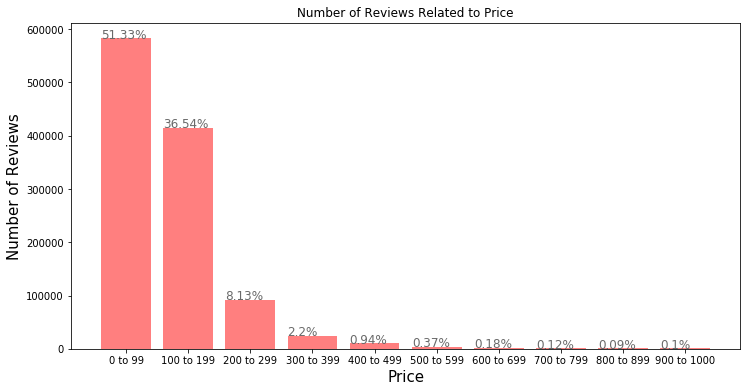

In [167]:
plt.figure(figsize=(12,6))
nop = plt.bar(x_axis, review_sum, color="r", align="center",alpha=0.5,)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, group_labels)
plt.xlabel('Price', fontsize = 15)
plt.ylabel('Number of Reviews', fontsize = 15)
plt.title('Number of Reviews Related to Price',)


label = ['583181', '415119', '92418', '24963', '10671', '4238', '2040', '1341', '988', '1137']


totals = []

for i in nop.patches:
    totals.append(i.get_height())
    
total = sum(totals)

for i in nop.patches:
    plt.text(i.get_x(), i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=12,
                color='dimgrey')

plt.show()
    

In [250]:
df_count = airbnb.groupby(['price'])['id'].count().reset_index()
df_count.head()

,price,id
0,0,11
1,10,17
2,11,3
3,12,4
4,13,1


In [242]:
df_count['price group'] = pd.cut(price_gby["price"], bins, labels=group_labels)
df_count.head()                            

,price,id,price group
0,0,11,NaN
1,10,17,0 to 99
2,11,3,0 to 99
3,12,4,0 to 99
4,13,1,0 to 99


In [246]:
id_group = df_count.groupby(['price group'])
id_group.sum()

,price,id
price group,,
0 to 99,4974,23917
100 to 199,15050,16583
200 to 299,24764,5027
300 to 399,31055,1594
400 to 499,34611,719
500 to 599,19884,266
600 to 699,16439,189
700 to 799,14464,169
800 to 899,16296,67


In [248]:
id_sum = id_group['id'].sum()
id_sum

price group
0 to 99        23917
100 to 199     16583
200 to 299      5027
300 to 399      1594
400 to 499       719
500 to 599       266
600 to 699       189
700 to 799       169
800 to 899        67
900 to 1000      114
Name: id, dtype: int64

In [226]:
x_axis = np.arange(len(group_labels))

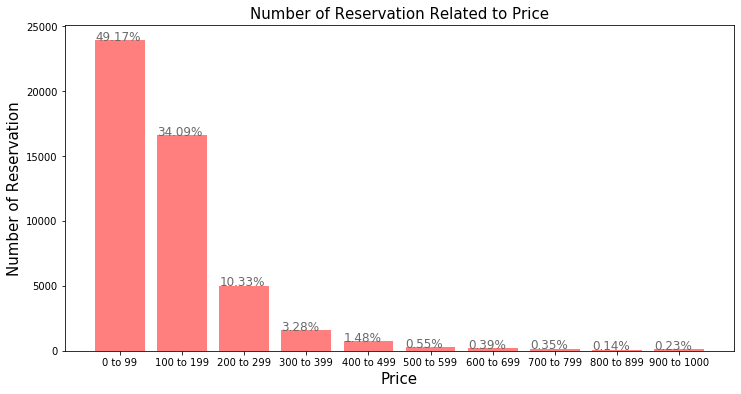

In [258]:
plt.figure(figsize=(12,6))
idsum = plt.bar(x_axis, id_sum, color="r", align="center",alpha=0.5,)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, group_labels)

plt.xlabel('Price', fontsize = 15)
plt.ylabel('Number of Reservation', fontsize = 15)
plt.title('Number of Reservation Related to Price', fontsize = 15)

label = ['23917', '16583', '5027', '1594', '719', '266', '189', '169', '67', '114']

totals = []

for i in idsum.patches:
    totals.append(i.get_height())
    
total = sum(totals)

for i in idsum.patches:
    plt.text(i.get_x(), i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=12,
                color='dimgrey')

plt.show()
    


In [6]:
#new dataframe shows number_of_reviews and price
airbnb_review_price = airbnb[['host_id', 'number_of_reviews', 'price']]

In [7]:
airbnb_review_price.head()

,host_id,number_of_reviews,price
0,2787,9,149
1,2845,45,225
2,4632,0,150
3,4869,270,89
4,7192,9,80


In [8]:
#find the most reviews 
airbnb_review_price['number_of_reviews'].max()

629

In [9]:
# find the house that has the most number of reviews. 
airbnb.set_index('number_of_reviews', inplace=True)
airbnb.loc[629]

id                                                9145202
name                              Room near JFK Queen Bed
host_id                                          47621202
host_name                                            Dona
neighbourhood_group                                Queens
neighbourhood                                     Jamaica
latitude                                          40.6673
longitude                                        -73.7683
room_type                                    Private room
price                                                  47
minimum_nights                                          1
last_review                                      7/5/2019
reviews_per_month                                   14.58
calculated_host_listings_count                          2
availability_365                                      333
Name: 629, dtype: object

In [10]:
#find the highest price
airbnb_review_price['price'].max()

10000

In [11]:
#find the most expensive house(3 houses found)
airbnb.set_index('price', inplace=True)
airbnb.loc[10000]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,last_review,reviews_per_month,calculated_host_listings_count,availability_365
price,,,,,,,,,,,,,,
10000,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,100,2/13/2016,0.04,1,0
10000,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,5,7/27/2017,0.16,1,0
10000,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,30,NaN,NaN,1,83


In [12]:
price = airbnb_review_price['price']

In [13]:
num_reviews = airbnb_review_price['number_of_reviews']


(1, 660.4651766004415)

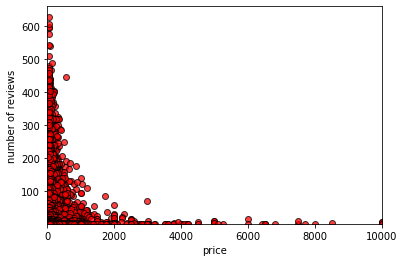

In [14]:
# Tells matplotlib that we want to make a scatter plot
# The size of each point on our plot is determined by their x value
fig = plt.scatter(price, num_reviews, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel('price')
plt.ylabel('number of reviews')
plt.xlim(0,10000)
plt.ylim(1,)


(1, 660.4651766004415)

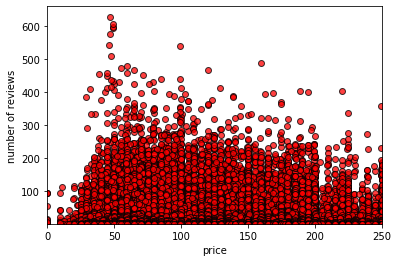

In [15]:
# let's see what the graph looks like if we take out some highest prices.only the house with the pirce between 0-2000
# The size of each point on our plot is determined by their x value
fig = plt.scatter(price, num_reviews, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel('price')
plt.ylabel('number of reviews')
plt.xlim(0,250)
plt.ylim(1,)


In [16]:
# make a new chart that only shows number_of_reviews and price
review_price=airbnb_review_price[['number_of_reviews', 'price']]
review_price.head()

,number_of_reviews,price
0,9,149
1,45,225
2,0,150
3,270,89
4,9,80


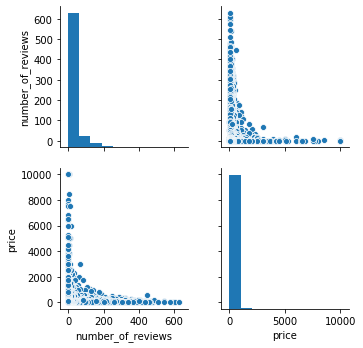

In [17]:
# use seaborn to plot graphs
sns.pairplot(review_price)

In [18]:
# see the correlation between number_of_reviews and price
review_price.corr()

,number_of_reviews,price
number_of_reviews,1.000000,-0.047954
price,-0.047954,1.000000


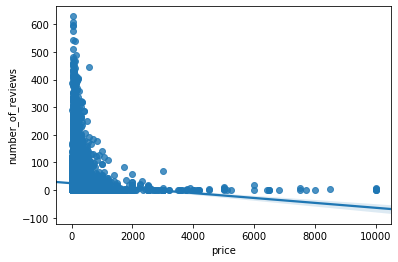

In [19]:
#use seaborn to plot the scattor plat with the liner regression line(best fit line).
sns.regplot(x='price', y='number_of_reviews', data=review_price)

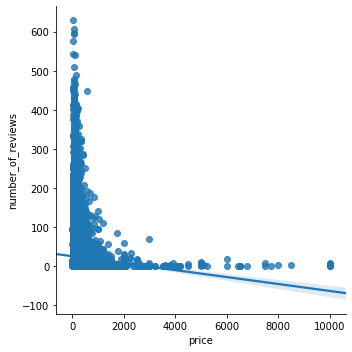

In [20]:

sns.lmplot(x='price', y='number_of_reviews', data=review_price)